In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

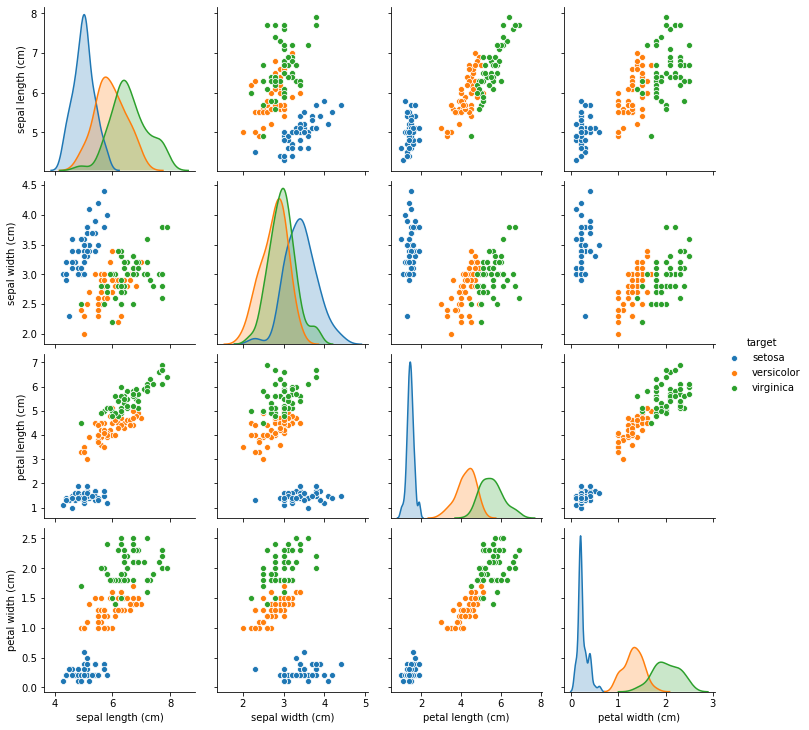

In [5]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df["target"] = np.array([iris.target_names[num] for num in iris.target])
sns.pairplot(iris_df, hue="target")

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.25, stratify=iris.target
)

In [11]:
rf_model = RandomForestClassifier(n_estimators=150).fit(X_train, y_train)

y_rf = rf_model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_rf), 4)*100.0, "%")

Accuracy: 97.37 %


In [14]:
importance = pd.DataFrame(
    zip(iris.feature_names, rf_model.feature_importances_), 
    columns=["Feature", "Importance"]
)
importance

,Feature,Importance
0,sepal length (cm),0.109261
1,sepal width (cm),0.023451
2,petal length (cm),0.432876
3,petal width (cm),0.434412


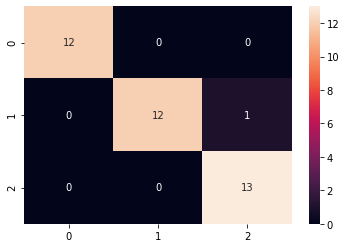

In [16]:
sns.heatmap(confusion_matrix(y_test, y_rf), annot=True)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(n_estimators=150).fit(X_train, y_train)

y_gbm = gbm_model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_gbm), 4)*100.0, "%")

Accuracy: 97.37 %


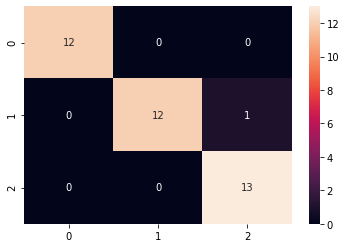

In [19]:
sns.heatmap(confusion_matrix(y_test, y_gbm), annot=True)

In [20]:
importance["GBM"] = gbm_model.feature_importances_
importance

,Feature,Importance,GBM
0,sepal length (cm),0.109261,0.005983
1,sepal width (cm),0.023451,0.015092
2,petal length (cm),0.432876,0.345194
3,petal width (cm),0.434412,0.633732
